In [24]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings(action = 'ignore')

In [41]:
IMG_SIZE = 256
BATCH_SIZE = 50

df = tf.keras.preprocessing.image_dataset_from_directory(
    directory = '../Data/Datathon-Dataset',
    shuffle = True,
    image_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE
)

Found 3224 files belonging to 4 classes.


In [42]:
df_classes = list(df.class_names)
df_classes

['category1_tumor', 'category2_tumor', 'category3_tumor', 'no_tumor']

In [43]:
len(df)

65

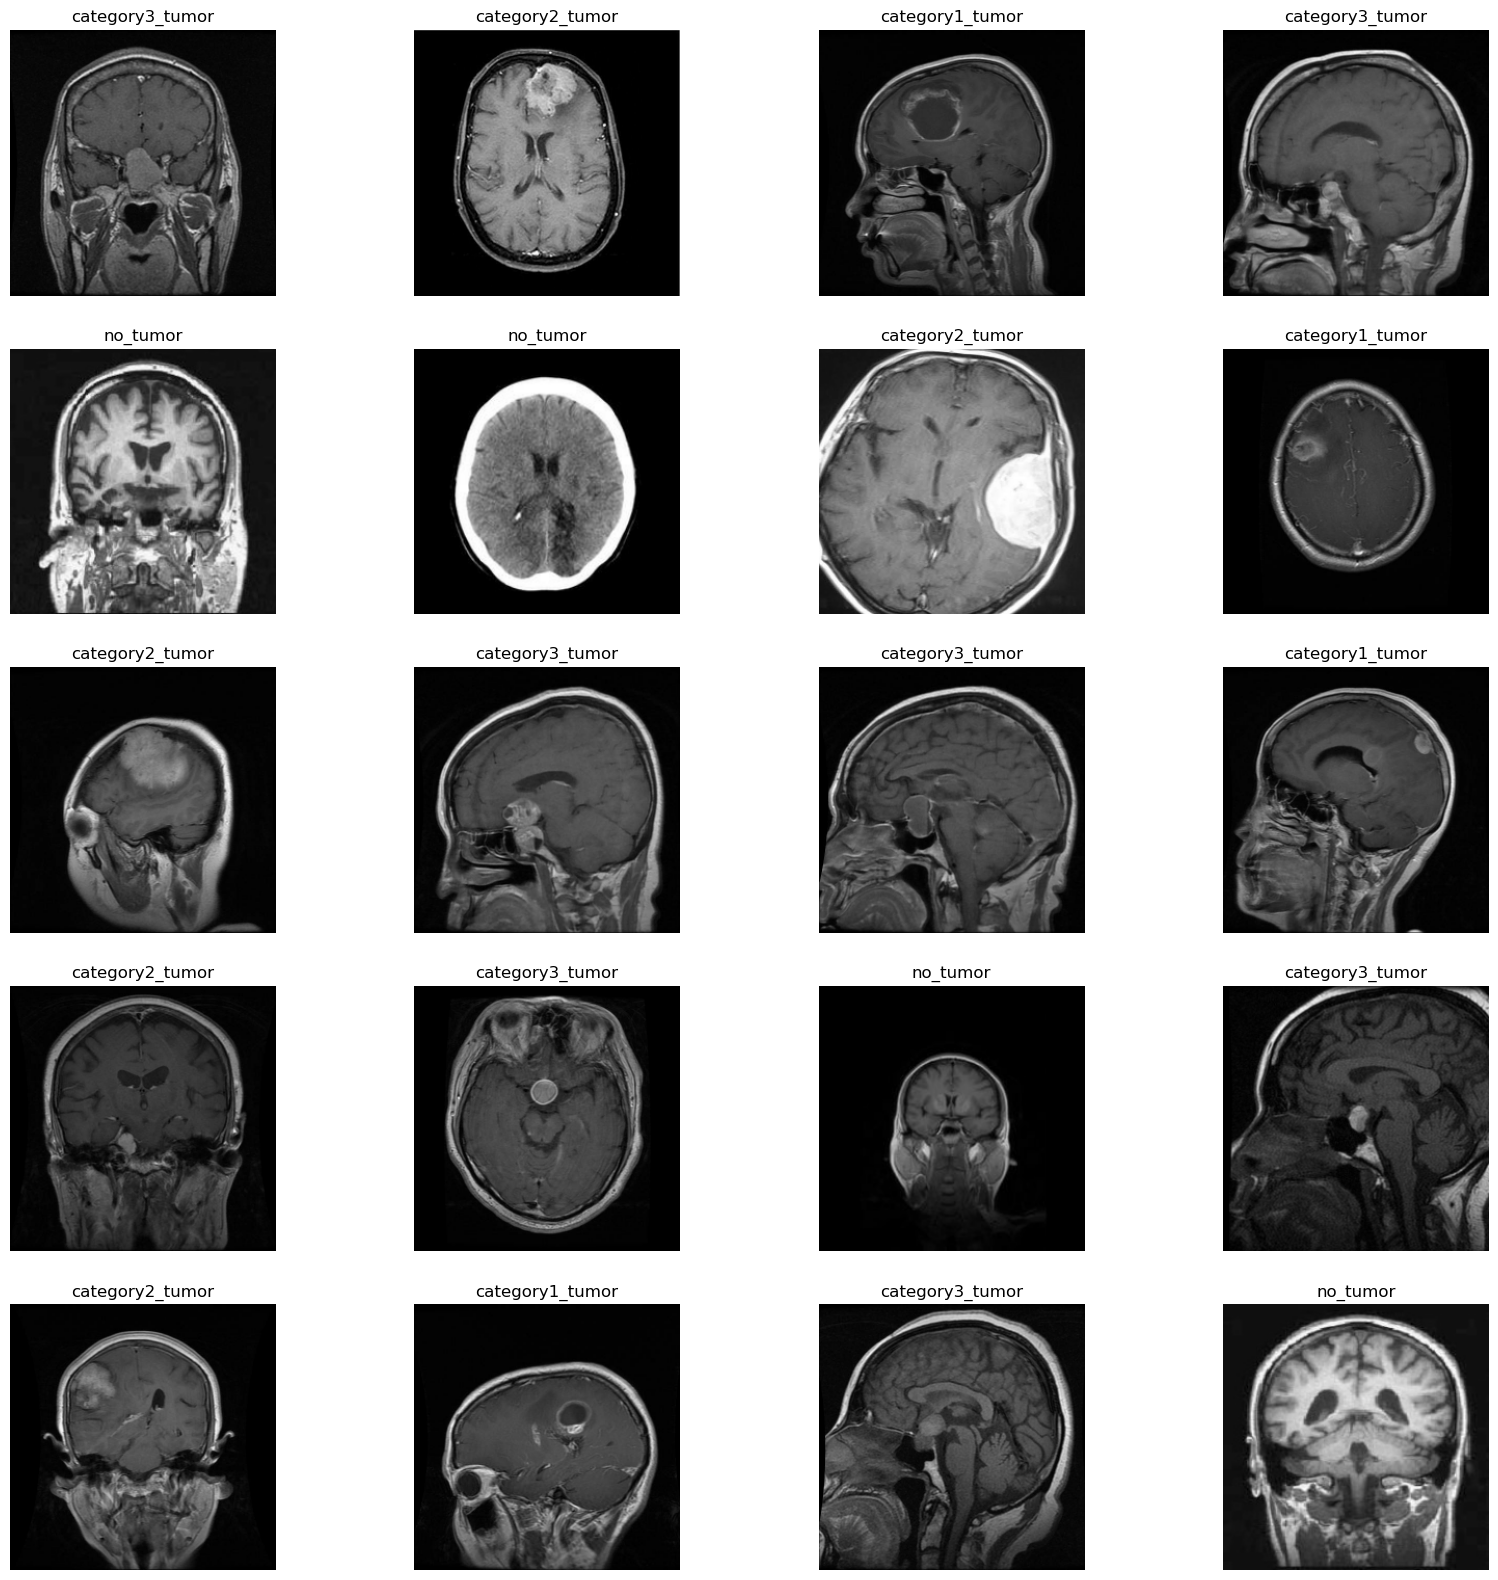

In [44]:
plt.figure(figsize=(20, 20))

for i, j in df.take(1):
   for k in range(20):
       ax = plt.subplot(5, 4, k + 1)
       plt.imshow(i[k].numpy().astype('uint8'))
       plt.title(df_classes[j[k]])
       plt.axis("off")

# Split Dataset

We split whole dataset in to 3 parts.
1. 80% to the training the model.
2. 10% to the validation the model.
3. 10% o the testing the model.

In [45]:
df_len = len(df)
train_size = int(df_len * 0.8)
val_size = int(df_len * 0.1)
test_size = int(df_len * 0.1)

print(f"Training dataset has :{train_size} batches")
print(f"Validation dataset has :{val_size} batches")
print(f"Testing dataset has :{test_size} batches")

Training dataset has :52 batches
Validation dataset has :6 batches
Testing dataset has :6 batches


In [46]:
df = df.shuffle(50, seed = 6)

train_df = df.take(train_size)
val_df = df.skip(train_size).take(val_size)
test_df = df.skip(train_size).skip(val_size).take(test_size)

In [47]:
print(f"Training dataset has :{len(train_df)} batches")
print(f"Validation dataset has :{len(val_df)} batches")
print(f"Testing dataset has :{len(test_df)} batches")

Training dataset has :52 batches
Validation dataset has :6 batches
Testing dataset has :6 batches


In [48]:
train_df = train_df.cache().shuffle(50).prefetch(buffer_size = tf.data.AUTOTUNE)
val_df = val_df.cache().shuffle(50).prefetch(buffer_size = tf.data.AUTOTUNE)
test_df = test_df.cache().shuffle(50).prefetch(buffer_size = tf.data.AUTOTUNE)

In [49]:
resize_layer = Sequential([
    layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0 / 255)
])

augmentation_layer = Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
Sequential([
    resize_layer,
    augmentation_layer,
    Conv2D()
])